# Gradient Boosting Classifier Model
---
The model in this notebook was strongly influenced by Natural Chan.  The following gradient boosted classifier will be used in an ordinal regression dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score

import time

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# from kappa_score import qwkappa

In [3]:
# The 'ID' feature is already dropped from cleaning notebook

# Open all source files as a pd dataframe
# This dataset will be used to train the gradient boosted model
orig_train = pd.read_csv('https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/train.csv')

#This dataset will be used to evaluate again the Kaggle compitition entry submission
orig_test = pd.read_csv('https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/test.csv')

# Addition datasets to explore the GradBoost model on actual wine data
red_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/red_white_data_noID.csv')
white_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/white_data_noID.csv')
red_white_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/red_white_data_noID.csv')
trainable_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/trainable_data_noID.csv')

# Drop 'ID' columns
orig_test = orig_test.drop(columns='Id')
orig_train = orig_train.drop(columns='Id')

# Create a place to save any generated files
gb_output_path = os.path.join(os.getcwd(),'grad boost output')
os.makedirs(gb_output_path, exist_ok = True)

In [4]:
# Split the data into training and testing sets
X_train = orig_train.drop('quality', axis=1)
y_train = orig_train['quality'].copy()
X_test = orig_test.copy()
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 42) #because it is the answer :)

# Investigate Gradient Boosted Model Parameters

In [5]:
# Create a Gradient Boosting Regressor
model = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # number of weak learning trees
    'learning_rate': [0.01, 0.1, 0.2], # control possibility of overfitting.
    # Strong interaction with n_estimators: smaller learning rates require more n_estimators
    'max_depth': [3, 5, 7] #  size of each tree
}

# Perform grid search with cross-validation, mark timer start
start_time = time.time()
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_gb = grid_search.best_estimator_
grid_search_time = time.time()

# Make predictions on the test data using the best model
y_pred = best_gb.predict(X_val)

# Report how long it took to complete Grid search and prediction
end_time = time.time()
grid_time = grid_search_time - start_time
pred_time = end_time - grid_search_time
tot_time = end_time - start_time

print(f"Time to complete Grid Search: {grid_time:.6f} seconds")
print(f"Time to complete prediction: {pred_time:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time:.6f} seconds")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.556 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.578 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.596 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.565 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.588 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.568 total time=   1.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.611 total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.574 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.591 to

In [6]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1 = f1_score(y_val, y_pred, average= 'weighted')
precision = precision_score(y_val, y_pred, average= 'weighted')
recall = recall_score(y_val, y_pred, average= 'weighted')
kappa = cohen_kappa_score(y_val, y_pred, weights='quadratic')

print(f"First model scores:")
print("-------------------")
print(f"Best Estimators: {best_gb.n_estimators}")
print(f"Best Learning Rate: {best_gb.learning_rate}")
print(f"Best Max Depth: {best_gb.max_depth}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Cohen Kappa Score, quadratic weighted: {kappa:.4f}")

First model scores:
-------------------
Best Estimators: 200
Best Learning Rate: 0.01
Best Max Depth: 3
Accuracy: 0.59
F1: 0.57
Precision: 0.59
Recall: 0.59
Cohen Kappa Score, quadratic weighted: 0.4648


In [8]:
# Change the number of weak learner trees
# Create a Gradient Boosting Regressor
model_2 = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid_2 = {
    'n_estimators': [200, 400, 800],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
start_time_2 = time.time()
grid_search_2 = GridSearchCV(model_2, param_grid_2, cv=5, verbose=3)
grid_search_2.fit(X_train, y_train)

# Get the best model from grid search
best_gb_2 = grid_search_2.best_estimator_
grid_search_time_2 = time.time()

# Make predictions on the test data using the best model
y_pred_2 = best_gb_2.predict(X_val)

# Report how long it took to complete Grid search and prediction
end_time_2 = time.time()
grid_time_2 = grid_search_time_2 - start_time_2
pred_time_2 = end_time_2 - grid_search_time_2
tot_time_2 = end_time_2 - start_time_2

print(f"Time to complete Grid Search: {grid_time_2:.6f} seconds")
print(f"Time to complete prediction: {pred_time_2:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time_2:.6f} seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.574 total time=   3.5s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.578 total time=   3.3s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.581 total time=   3.3s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.562 total time=   3.4s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.582 total time=   3.3s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=400;, score=0.565 total time=   6.6s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=400;, score=0.562 total time=   6.8s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=400;, score=0.593 total time=   6.7s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=400;, score=0.571 total time=   6.7s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=400;,

In [9]:
# Calculate metrics
accuracy_2 = accuracy_score(y_val, y_pred_2)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1_2 = f1_score(y_val, y_pred_2, average= 'weighted')
precision_2 = precision_score(y_val, y_pred_2, average= 'weighted')
recall_2 = recall_score(y_val, y_pred_2, average= 'weighted')
kappa_2 = cohen_kappa_score(y_val, y_pred_2, weights='quadratic')

print(f"Second model scores:")
print("-------------------")
print(f"Best Estimators: {best_gb_2.n_estimators}")
print(f"Best Learning Rate: {best_gb_2.learning_rate}")
print(f"Best Max Depth: {best_gb_2.max_depth}")
print(f"Accuracy: {accuracy_2:.2f}")
print(f"F1: {f1_2:.2f}")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"Cohen Kappa Score, quadratic weighted: {kappa_2:.4f}")

Second model scores:
-------------------
Best Estimators: 400
Best Learning Rate: 0.01
Best Max Depth: 3
Accuracy: 0.59
F1: 0.57
Precision: 0.58
Recall: 0.59
Cohen Kappa Score, quadratic weighted: 0.4534


In [10]:
# Change the number of weak learner trees
# Create a Gradient Boosting Regressor
model_3 = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid_3 = {
    'n_estimators': [200, 400, 800],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [2, 3, 5]
}

# Perform grid search with cross-validation
start_time_3 = time.time()
grid_search_3 = GridSearchCV(model_3, param_grid_3, cv=5, verbose=3)
grid_search_3.fit(X_train, y_train)

# Get the best model from grid search
best_gb_3 = grid_search_3.best_estimator_
grid_search_time_3 = time.time()

# Make predictions on the test data using the best model
y_pred_3 = best_gb_3.predict(X_val)

# Report how long it took to complete Grid search and prediction
end_time_3 = time.time()
grid_time_3 = grid_search_time_3 - start_time_3
pred_time_3 = end_time_3 - grid_search_time_3
tot_time_3 = end_time_3 - start_time_3

print(f"Time to complete Grid Search: {grid_time_3:.6f} seconds")
print(f"Time to complete prediction: {pred_time_3:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time_3:.6f} seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.556 total time=   2.5s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.584 total time=   2.6s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.578 total time=   2.6s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.517 total time=   2.4s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.570 total time=   2.3s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=400;, score=0.544 total time=   4.6s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=400;, score=0.584 total time=   5.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=400;, score=0.587 total time=   4.7s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=400;, score=0.550 total time=   4.6s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=400;,

In [11]:
# Calculate metrics
accuracy_3 = accuracy_score(y_val, y_pred_3)
# the following metrics need to include the average type since the validation is ordinal and not binary
f1_3 = f1_score(y_val, y_pred_3, average= 'weighted')
precision_3 = precision_score(y_val, y_pred_3, average= 'weighted')
recall_3 = recall_score(y_val, y_pred_3, average= 'weighted')
kappa_3 = cohen_kappa_score(y_val, y_pred_3, weights='quadratic')

print(f"Third model scores:")
print("-------------------")
print(f"Best Estimators: {best_gb_3.n_estimators}")
print(f"Best Learning Rate: {best_gb_3.learning_rate}")
print(f"Best Max Depth: {best_gb_3.max_depth}")
print(f"Accuracy: {accuracy_3:.2f}")
print(f"F1: {f1_3:.2f}")
print(f"Precision: {precision_3:.2f}")
print(f"Recall: {recall_3:.2f}")
print(f"Cohen Kappa Score, quadratic weighted: {kappa_3:.4f}")

Third model scores:
-------------------
Best Estimators: 400
Best Learning Rate: 0.01
Best Max Depth: 2
Accuracy: 0.61
F1: 0.59
Precision: 0.60
Recall: 0.61
Cohen Kappa Score, quadratic weighted: 0.4962


# Classification Reports

In [13]:
print("--------------------------------------------------------")

best_hp = grid_search.best_params_
print(f"Best Hyperparameters From the Second Round Grad Boost Model Search ")
print(f"     Learning Rate =   {best_gb.learning_rate}")
print(f"     Number of Trees = {best_gb.n_estimators}")
print(f"     Max Tree Depth =  {best_gb.max_depth}")
print()
print("--------------------------------------------------------")
print(f"Second Round Grad Boosted Model Classification Report")
print(classification_report(y_val,y_pred))
print()
print("--------------------------------------------------------")
print()
print(f"Second Round Grad Boosted Quadratic Weighted Kappa Score: {kappa:.4f}")
print()
print("--------------------------------------------------------")

--------------------------------------------------------
Best Hyperparameters From the Second Round Grad Boost Model Search 
     Learning Rate =   0.01
     Number of Trees = 200
     Max Tree Depth =  3

--------------------------------------------------------
Second Round Grad Boosted Model Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.12      0.22         8
           5       0.65      0.74      0.69       169
           6       0.52      0.60      0.56       158
           7       0.61      0.32      0.42        69
           8       0.00      0.00      0.00         6

    accuracy                           0.59       412
   macro avg       0.46      0.30      0.32       412
weighted avg       0.59      0.59      0.57       412


--------------------------------------------------------

Second Round Grad Boosted Quadratic Weighted Kappa Score: 0.4648

---------------

In [14]:
print("--------------------------------------------------------")

best_hp_2 = grid_search_2.best_params_
print(f"Best Hyperparameters From the Second Round Grad Boost Model Search ")
print(f"     Learning Rate =   {best_gb_2.learning_rate}")
print(f"     Number of Trees = {best_gb_2.n_estimators}")
print(f"     Max Tree Depth =  {best_gb_2.max_depth}")
print()
print("--------------------------------------------------------")
print(f"Second Round Grad Boosted Model Classification Report")
print(classification_report(y_val,y_pred_2))
print()
print("--------------------------------------------------------")
print()
print(f"Second Round Grad Boosted Quadratic Weighted Kappa Score: {kappa_2:.4f}")
print()
print("--------------------------------------------------------")

--------------------------------------------------------
Best Hyperparameters From the Second Round Grad Boost Model Search 
     Learning Rate =   0.01
     Number of Trees = 400
     Max Tree Depth =  3

--------------------------------------------------------
Second Round Grad Boosted Model Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.12      0.22         8
           5       0.65      0.73      0.69       169
           6       0.52      0.59      0.56       158
           7       0.57      0.35      0.43        69
           8       0.00      0.00      0.00         6

    accuracy                           0.59       412
   macro avg       0.46      0.30      0.32       412
weighted avg       0.58      0.59      0.57       412


--------------------------------------------------------

Second Round Grad Boosted Quadratic Weighted Kappa Score: 0.4534

---------------

In [17]:
print("--------------------------------------------------------")

best_hp_3 = grid_search_2.best_params_
print(f"Best Hyperparameters From the Second Round Grad Boost Model Search ")
print(f"     Learning Rate =   {best_gb_3.learning_rate}")
print(f"     Number of Trees = {best_gb_3.n_estimators}")
print(f"     Max Tree Depth =  {best_gb_3.max_depth}")
print()
print("--------------------------------------------------------")
print(f"Second Round Grad Boosted Model Classification Report")
print(classification_report(y_val,y_pred_3))
print()
print("--------------------------------------------------------")
print()
print(f"Second Round Grad Boosted Quadratic Weighted Kappa Score: {kappa_3:.4f}")
print()
print("--------------------------------------------------------")

--------------------------------------------------------
Best Hyperparameters From the Second Round Grad Boost Model Search 
     Learning Rate =   0.01
     Number of Trees = 400
     Max Tree Depth =  2

--------------------------------------------------------
Second Round Grad Boosted Model Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.67      0.73      0.70       169
           6       0.54      0.65      0.59       158
           7       0.70      0.38      0.49        69
           8       0.00      0.00      0.00         6

    accuracy                           0.61       412
   macro avg       0.32      0.29      0.30       412
weighted avg       0.60      0.61      0.59       412


--------------------------------------------------------

Second Round Grad Boosted Quadratic Weighted Kappa Score: 0.4962

---------------

# Confusion Matrix

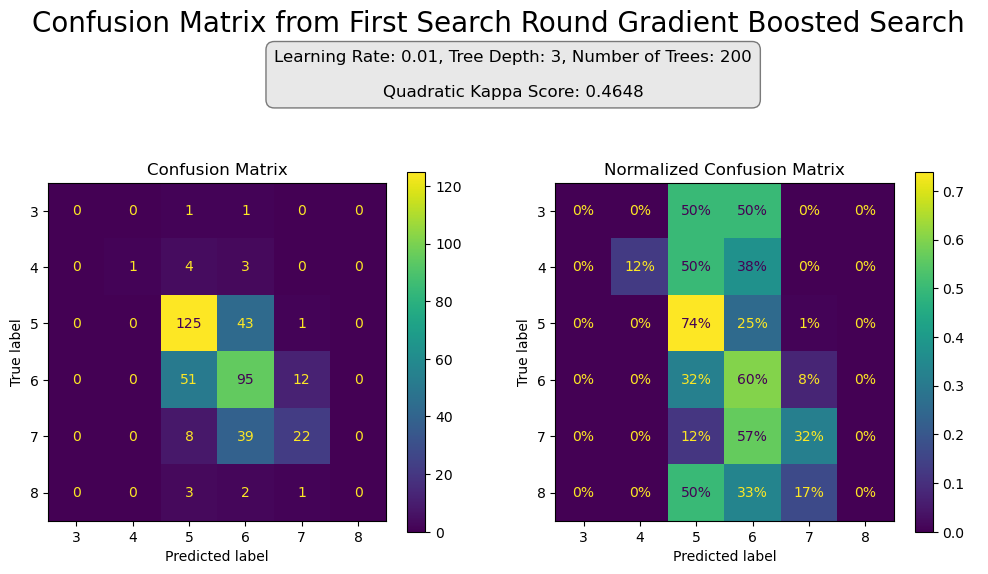

In [23]:
# Create the figure and gridspec
fig = plt.figure(figsize = (12,6))
grid_spec = GridSpec(2, 2, figure=fig, width_ratios = [3,3], height_ratios=[1, 6])

# Model specs subplot
model_specs=  f"Learning Rate: {best_gb.learning_rate}, Tree Depth: {best_gb.max_depth}, Number of Trees: {best_gb.n_estimators}\n\nQuadratic Kappa Score: {kappa:.4f}"   
upper_ax = fig.add_subplot(grid_spec[0, :])

# plt.upper_ax_adjust(hspace = 0.5)
upper_text = upper_ax.text(0.5, 0.55, model_specs, ha='center', fontsize=12,
                           bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
upper_ax.axis('off')

# Confusion Matrix Subplot
conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_val, y_pred, ax=fig.add_subplot(grid_spec[1, 0]))
conf_matrix_display.ax_.set_title("Confusion Matrix")

# Normalized Confusion Matrix Subplot
normalized_conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                                         normalize='true',
                                                                         values_format='.0%',
                                                                         ax=fig.add_subplot(grid_spec[1, 1]))
normalized_conf_matrix_display.ax_.set_title("Normalized Confusion Matrix")


# Adjust Layout
plt.tight_layout
plt.suptitle("Confusion Matrix from First Search Round Gradient Boosted Search", fontsize=20)

# Save and show the figure
output_filename = f"{gb_output_path}/gb_model_kappa={kappa:.4f}_confusion_matrix.png"
plt.savefig(output_filename)
plt.show()

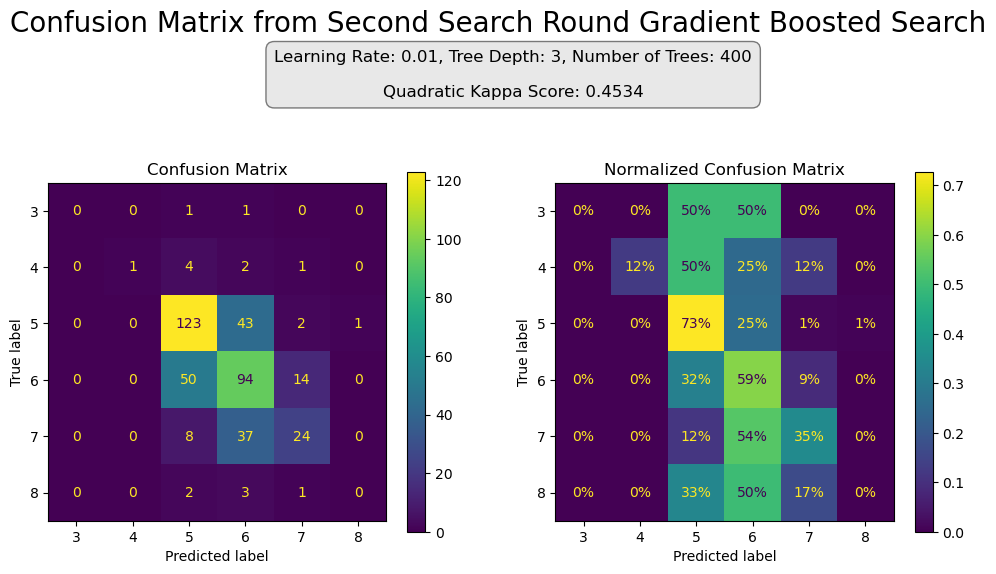

In [22]:
# Create the figure and gridspec
fig = plt.figure(figsize = (12,6))
grid_spec = GridSpec(2, 2, figure=fig, width_ratios = [3,3], height_ratios=[1, 6])

# Model specs subplot
model_specs =  f"Learning Rate: {best_gb_2.learning_rate}, Tree Depth: {best_gb_2.max_depth}, Number of Trees: {best_gb_2.n_estimators}\n\nQuadratic Kappa Score: {kappa_2:.4f}"   
upper_ax = fig.add_subplot(grid_spec[0, :])

# plt.upper_ax_adjust(hspace = 0.5)
upper_text = upper_ax.text(0.5, 0.55, model_specs, ha='center', fontsize=12,
                           bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
upper_ax.axis('off')

# Confusion Matrix Subplot
conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2, ax=fig.add_subplot(grid_spec[1, 0]))
conf_matrix_display.ax_.set_title("Confusion Matrix")

# Normalized Confusion Matrix Subplot
normalized_conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2,
                                                                         normalize='true',
                                                                         values_format='.0%',
                                                                         ax=fig.add_subplot(grid_spec[1, 1]))
normalized_conf_matrix_display.ax_.set_title("Normalized Confusion Matrix")


# Adjust Layout
plt.tight_layout
plt.suptitle("Confusion Matrix from Second Search Round Gradient Boosted Search", fontsize=20)

# Save and show the figure
output_filename = f"{gb_output_path}/gb_2nd_model_kappa={kappa_2:.4f}_confusion_matrix.png"
plt.savefig(output_filename)
plt.show()

In [20]:
# Create the figure and gridspec
fig = plt.figure(figsize = (12,6))
grid_spec = GridSpec(2, 2, figure=fig, width_ratios = [3,3], height_ratios=[1, 6])

# Model specs subplot
model_specs =  f"Learning Rate: {best_gb_3.learning_rate}, Tree Depth: {best_gb_3.max_depth}, Number of Trees: {best_gb_3.n_estimators}\n\nQuadratic Kappa Score: {kappa_3:.4f}"   
upper_ax = fig.add_subplot(grid_spec[0, :])

# plt.upper_ax_adjust(hspace = 0.5)
upper_text = upper_ax.text(0.5, 0.55, model_specs, ha='center', fontsize=12,
                           bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
upper_ax.axis('off')

# Confusion Matrix Subplot
conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_3, ax=fig.add_subplot(grid_spec[1, 0]))
conf_matrix_display.ax_.set_title("Confusion Matrix")

# Normalized Confusion Matrix Subplot
normalized_conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_3,
                                                                         normalize='true',
                                                                         values_format='.0%',
                                                                         ax=fig.add_subplot(grid_spec[1, 1]))
normalized_conf_matrix_display.ax_.set_title("Normalized Confusion Matrix")


# Adjust Layout
plt.tight_layout
plt.suptitle("Confusion Matrix from Third Search Round Gradient Boosted Search", fontsize=20)

# Save and show the figure
output_filename = f"{gb_output_path}/gb_3rd_model_kappa={kappa_3:.4f}_confusion_matrix.png"
plt.savefig(output_filename)
plt.show()

AttributeError: 'dict' object has no attribute 'learning_rate'

<Figure size 1200x600 with 0 Axes>

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first confusion matrix
axs[0].set_title("Confusion Matrix")
conf_matrix_display_1 = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2, ax=axs[0])
# conf_matrix_display_1.plot(cmap=plt.cm.Blues, ax=axs[0])

# Calculate sample_weight
sample_weight = (y_pred != y_val)

# Plot the second confusion matrix
axs[1].set_title("Normalized Confusion Matrix")
conf_matrix_display_2 = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_2,
                                                            #    sample_weight=sample_weight,
                                                               normalize='true',
                                                               values_format='.0%',
                                                               ax=axs[1])
# conf_matrix_display_2.plot(cmap=plt.cm.Blues, ax=axs[1])

# Create the super title lines
title_line1 = "Gradient Boosted Model Confusion Matrix\n\n\n\n\n\n\n\n"
title_line2 = f"Learning Rate: {best_hp_2['learning_rate']},     Tree Depth: {best_hp_2['max_depth']},     Number of Trees: {best_hp_2['n_estimators']}\n\n\n\n\n\n\n\n\n"
title_line3 = f"Quadratic Kappa Score: {kappa_2:.4f}\n\n\n\n\n\n"
fig.text(0.5, 0.9, title_line1, fontsize=28, ha='center', va='center')
fig.text(0.5, 0.9, title_line2, fontsize=16, ha='center', va='center')
fig.text(0.5, 0.9, title_line3, fontsize=16, ha='center', va='center')

# Adjust layout
plt.tight_layout()
plt.savefig(f"{gb_output_path}/gb_model_kappa={kappa_2:.2f}_confusion_matrix.png")
plt.show()